<a href="https://colab.research.google.com/github/Nahida-Karaja/Research3/blob/main/RESEARCH_KARAJA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
tf.__version__

'2.12.0'

In [ ]:
#import lipraries
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob


In [ ]:
#re-size all the images
IMAGE_SIZE= [224, 224]

train_path='/content/drive/MyDrive/dataset/train'
test_path='/content/drive/MyDrive/dataset/test'


In [ ]:
#we will using
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
for layer in resnet.layers:
  layer.trainable= False

In [ ]:
#number of output classes
folders=glob('/content/drive/MyDrive/dataset/train/*')

In [ ]:
#our layers
x=Flatten()(resnet.output)

In [ ]:
prediction=Dense(len(folders),activation='softmax')(x)
#create a model opject
model=Model(inputs=resnet.input, outputs=prediction)

In [ ]:
#view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:


from keras.api._v2.keras import losses
from keras.optimizers import optimizer
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_datagen=ImageDataGenerator(rescale=1./255)
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)


In [ ]:
training_set= train_datagen.flow_from_directory('/content/drive/MyDrive/dataset/train',
                                                target_size=(224,224),
                                                batch_size=16,
                                                class_mode='categorical')

Found 22 images belonging to 5 classes.


In [ ]:
test_set= test_datagen.flow_from_directory('/content/drive/MyDrive/dataset/test',
                                                target_size=(224,224),
                                                batch_size=16,
                                                class_mode='categorical')

Found 14 images belonging to 5 classes.


In [ ]:
r=model.fit_generator(training_set,
                      validation_data=test_set,
                      epochs=50,
                      steps_per_epoch=len(training_set),
                      validation_steps=len(test_set))

<ipython-input-25-bda7c3eb754f>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r=model.fit_generator(training_set,


Epoch 1/50
2/2 [==============================] - 17s 9s/step - loss: 2.4517 - accuracy: 0.2273 - val_loss: 15.7626 - val_accuracy: 0.2143
Epoch 2/50
2/2 [==============================] - 7s 5s/step - loss: 12.4458 - accuracy: 0.3182 - val_loss: 15.8916 - val_accuracy: 0.2143
Epoch 3/50
2/2 [==============================] - 8s 6s/step - loss: 9.1673 - accuracy: 0.2273 - val_loss: 13.3041 - val_accuracy: 0.2143
Epoch 4/50
2/2 [==============================] - 11s 9s/step - loss: 10.2917 - accuracy: 0.2727 - val_loss: 9.0972 - val_accuracy: 0.3571
Epoch 5/50
2/2 [==============================] - 7s 4s/step - loss: 7.9755 - accuracy: 0.3182 - val_loss: 8.0462 - val_accuracy: 0.2143
Epoch 6/50
2/2 [==============================] - 10s 9s/step - loss: 5.6879 - accuracy: 0.3182 - val_loss: 2.2167 - val_accuracy: 0.2857
Epoch 7/50
2/2 [==============================] - 7s 4s/step - loss: 2.0812 - accuracy: 0.4091 - val_loss: 4.3271 - val_accuracy: 0.2857
Epoch 8/50
2/2 [=================

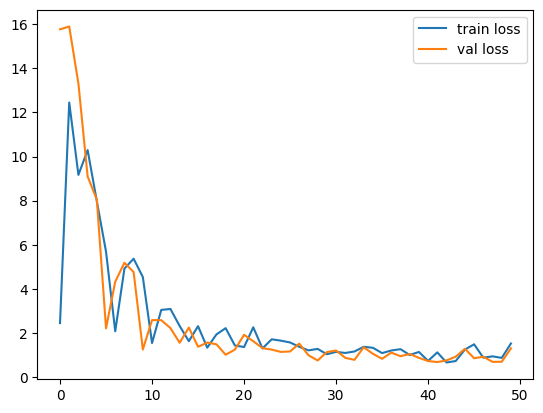

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')




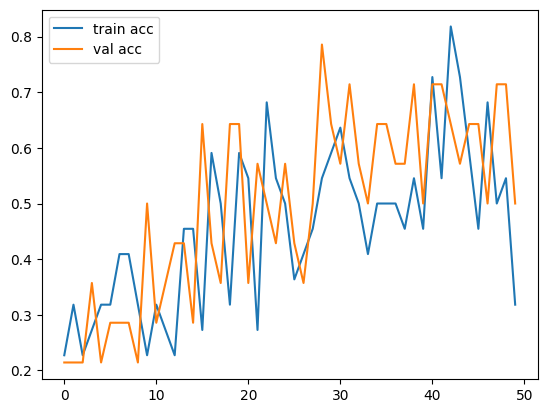

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')




In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras import Model
model.save('model_resnet50.h5')

In [ ]:
!nvidia-smi

Sun Apr 23 16:37:53 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------